##### Copyright 2022 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Structured Data Classification using TFDF

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/decision_forests/tutorials/kaggle_beginner_example_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/decision-forests/blob/main/documentation/tutorials/kaggle_beginner_example_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/decision-forests/blob/main/documentation/tutorials/kaggle_beginner_example_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/decision-forests/documentation/tutorials/kaggle_beginner_example_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Introduction

[TensorFlow Decision Forests](https://www.tensorflow.org/decision_forests)
is a collection of state-of-the-art algorithms of Decision Forest models
that are compatible with [Keras APIs](https://www.tensorflow.org/api_docs/python/tf/keras)
.
The models include [Random Forests](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel),
[Gradient Boosted Trees](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel),
and [CART](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/CartModel),
and can be used for regression, classification, and ranking tasks.
For an introduction to [TFDF](https://www.tensorflow.org/decision_forests) without Kaggle, please refer to this [tutorial](https://www.tensorflow.org/decision_forests/tutorials/beginner_colab).
Decision Forests are a family of tree-based models including Random Forests and Gradient Boosted Trees. They are the best place to start when working with tabular data, and will often outperform neural networks.

In this example we will use TensorFlow to train each of these on a dataset you load from a CSV file. This is a common pattern in practice. Roughly, your code will look as follows:

```
import tensorflow_decision_forests as tfdf
import pandas as pd
  
dataset = pd.read_csv("project/dataset.csv")
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="my_label",  task=tfdf.keras.Task.CLASSIFICATION)

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)
  
print(model.summary())
```

### Setup

#### Install TensorFlow Decision Forests

In [ ]:
!pip install tensorflow_decision_forests --quiet

#### Import the library

In [ ]:
# Scientific computing # 
import numpy as np     # Numpy Documentation -  https://numpy.org/doc/stable/ 

# -  Data processing - #
import pandas as pd    # Pandas Documentation - https://pandas.pydata.org/docs/

# ---- Tensorflow ---- #
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.9.1
TensorFlow Decision Forests v0.2.7


### Download the Titanic dataset
The [Titanic dataset](https://www.kaggle.com/competitions/titanic/overview/description) is an example of a binary classification problem in supervised learning. We are classifying the outcome of the passengers as either one of two classes, survived or did not survive the Titanic.

To run this notebook, you need to have a Kaggle account.

If you do not have an account, you can create one here: [Kaggle Register](https://www.kaggle.com/account/login?phase=startRegisterTab&returnUrl=%2F) 

In order to get a token to use in the following cell, check out the [Authentication Section](https://www.kaggle.com/docs/api#authentication) of Kaggle API documentation

In [ ]:
#@title Enter your Kaggle token in order to fetch the dataset

username = '' #@param {type:"string"}
key = '' #@param {type: "string"}

In [ ]:
#@title Configure Kaggle
try:
  from google.colab import files, drive

  # Install and Configure Kaggle
  import json

  token = {
    "username":username,
    "key":key
  }

  # Installing kaggle
  !pip install kaggle &> /dev/null

  # Creating .kaggle if necessary
  !if [ -d .kaggle ]; then echo ".kaggle exists"; else echo ".kaggle does not exist ... Creating it"; mkdir .kaggle; if [ -d .kaggle ]; then echo "Successfully created"; else echo "Error creating .kaggle"; fi; fi

  with open('/content/.kaggle/kaggle.json', 'w') as file:
      json.dump(token, file)

  # Creating .kaggle if necessary
  !if [ -d  ~/.kaggle ]; then echo " ~/.kaggle exists"; else echo " ~/.kaggle does not exist ... Creating it"; mkdir  ~/.kaggle; if [ -d  ~/.kaggle ]; then echo "Successfully created"; else echo "Error creating  ~/.kaggle"; fi; fi
  !cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

  # kaggle configuration
  !kaggle config set -n path -v{/content}

  # Changing mode
  !chmod 600 /root/.kaggle/kaggle.json
except Exception:
  pass

In [ ]:
#@title Download Dataset
import os

DOWNLOAD_LOCATION = "/root/Downloads/"

if os.path.exists(DOWNLOAD_LOCATION):
    if os.path.isdir(DOWNLOAD_LOCATION):
        print("{} exists and is a directory".format(DOWNLOAD_LOCATION))
    else:
        print("{} exists but is not a directory!!!".format(DOWNLOAD_LOCATION))
else:
    print("{} does not exist ... Creating it".format(DOWNLOAD_LOCATION))
    os.makedirs(DOWNLOAD_LOCATION)

# Downloading
!kaggle competitions download -c titanic -p {DOWNLOAD_LOCATION}

# Extracting archives
!cd {DOWNLOAD_LOCATION}; unzip -qq \*.zip; rm -f *.zip

## Load the dataset
Note: Pandas is practical as you don't have to type in name of the input features to load them. For larger datasets (>1M examples), using the [TensorFlow Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) to read the files may be better suited.

In [ ]:
train_file_path = os.path.join(DOWNLOAD_LOCATION, "train.csv")
train_full_data = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(train_full_data.shape))

Full train dataset shape is (891, 12)


The data is composed of 12 columns and 891 entries. We can see all 12 dimensions of our dataset by printing out the first 3 entries using the following code: 


In [ ]:
train_full_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


* 8 feature columns named `Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, Embarked`.
* Label column named `Survived`.
* We will drop the following unnecessary columns : `PassengerId`, `Name` and `Ticket`

In [ ]:
train_full_data = train_full_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
train_full_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S


Refer to [Kaggle](https://www.kaggle.com/competitions/titanic/data) for a comprehensive guide to the data.

## Exploratory Data Analysis (EDA)
Data scientists use exploratory analysis techniques to analyze and visualize large datasets. This process helps them identify the main characteristics of their data sets and develop effective strategies to get the answers they need. It can also help them spot anomalies and test hypotheses.

For this dataset, there are some amazing notebooks already available on Kaggle. One of them is [EDA is fun](https://www.kaggle.com/code/prashant111/eda-is-fun#EDA-is-fun) by Prashant Banerjee.

## Prepare the dataset
This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models; making them a great entry point to TensorFlow and ML.

Convert the values stored in the `Survived` column to a list of values, where the list does not allow for duplicates. `Survived` has one of two values, 0 or 1.

In [ ]:
label="Survived"
classes = train_full_data[label].unique().tolist()
print(f"Label classes: {classes}")

Label classes: [0, 1]


Split the dataset into training and testing:

In [ ]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, val_ds_pd = split_dataset(train_full_data)
print("{} examples in training, {} examples in validation.".format(
    len(train_ds_pd), len(val_ds_pd)))

611 examples in training, 280 examples in validation.


There's one more step required before you can train your model. You need to convert from Pandas format (`pd.DataFrame`) into TensorFlow format (`tf.data.Dataset`). A single line helper function that will do this for you: 

```
tfdf.keras.pd_dataframe_to_tf_dataset(your_df, label='your_label', task=tfdf.keras.Task.CLASSIFICATION)
```

This is a high [performance](https://www.tensorflow.org/guide/data_performance) data loading library which is helpful when training neural networks with accelerators like [GPUs](https://cloud.google.com/gpu) and [TPUs](https://cloud.google.com/tpu). It is not necessary for tree-based models until you begin to do distributed training.

Note that tf.data is a bit tricky to use, and has a learning curve. There are guides on [tensorflow.org/guide](https://www.tensorflow.org/guide) to help.

In [ ]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    train_ds_pd, 
    label = label, 
    task = tfdf.keras.Task.CLASSIFICATION)

val_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    val_ds_pd, 
    label = label, 
    task = tfdf.keras.Task.CLASSIFICATION)

## Create and train a Random Forest model 

In [ ]:
model = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.CLASSIFICATION)
model.compile(metrics=["accuracy"])    # Optional, you can use this to include a list of eval metrics

In [ ]:
model.fit(x=train_ds)

## Visualize your model
One benefit of tree-based models is that you can easily visualize them. The default number of trees used in the Random Forest is 300. You can select a tree to display below.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, tree_idx=0, max_depth=3)

## Evaluate the model on OOB data and the validation dataset

Let's plot accuracy on OOB evaluation dataset as a function of the number of trees in the forest. One of the nice features about this particular hyperparameter is that larger values are usually better, and come with little risk aside from slowing down training.

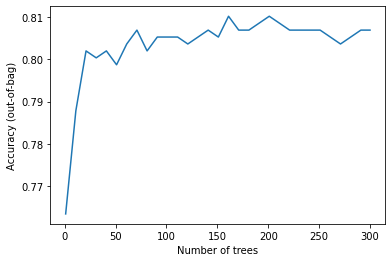

In [ ]:
import matplotlib.pyplot as plt
logs = model.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

You can also see some general stats on the OOB dataset:

In [ ]:
inspector = model.make_inspector()
inspector.evaluation()

Evaluation(num_examples=611, accuracy=0.806873977086743, loss=0.7393123309627944, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

Now, let's run an evaluation using the test data.

In [ ]:
evaluation = model.evaluate(x=val_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 1s 958ms/step - loss: 0.0000e+00 - accuracy: 0.8679
loss: 0.0000
accuracy: 0.8679


## Test Set Prediction
Now we will do prediction on `test.csv`.


In [ ]:
test_file_path = os.path.join(DOWNLOAD_LOCATION, "test.csv")
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('PassengerId')

In [ ]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data, 
    task = tfdf.keras.Task.CLASSIFICATION)

Since the prediction can be either 0 (Not survived) or 1 (Survived), let's convert the predited float value to binary value

In [ ]:
preds = model.predict(test_ds)
preds = preds >= 0.5
preds = preds.astype('int')

In [ ]:
output = pd.DataFrame({'PassengerId': ids,
                       'Survived': preds.squeeze()})

output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


You can download the predicted output as a CSV file and do submission on the [Competition page](https://www.kaggle.com/competitions/titanic/submit) on Kaggle.

In [ ]:
output_filename = "test_prediction_output.csv"
output.to_csv(output_filename, index=False)

In [ ]:
from google.colab import files
files.download('test_prediction_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# References
* Dive deep into 
    * [Random Forests](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/RandomForestModel)
    * [Gradient Boosted Trees](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/GradientBoostedTreesModel)
    * [CART](https://www.tensorflow.org/decision_forests/api_docs/python/tfdf/keras/CartModel)
    * [Keras API](https://www.tensorflow.org/api_docs/python/tf/keras)
    * [TensorFlow Decision Forests (TF-DF)](https://www.tensorflow.org/decision_forests).
* [EDA is fun](https://www.kaggle.com/code/prashant111/eda-is-fun#EDA-is-fun) by Prashant Banerjee.
*   TensorFlow Decision Forests tutorials which are a set of 3 very interesting tutorials.
    * [Beginner Tutorial](https://www.tensorflow.org/decision_forests/tutorials/beginner_colab)
    * [Intermediate Tutorial](https://www.tensorflow.org/decision_forests/tutorials/intermediate_colab)
    * [Advanced Tutorial](https://www.tensorflow.org/decision_forests/tutorials/advanced_colab)
*   The [TensorFlow Forum](https://discuss.tensorflow.org/) where one can get in touch with the TensorFlow community. Check it out if you haven't yet.